In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import unicode_literals
from IPython.core.display import display, HTML

In [2]:
# Global configurations
# ---------------------

# Expand the notebook to the width of the browser
display(HTML("<style>.container { width:100% !important; }</style>"))

# Matplotlib style
plt.style.use('seaborn-colorblind')

# Use LaTeX and its body font for the diagrams' text.
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = ['Nimbus Roman Becker No9L']

# Font sizes
SIZE = 24
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE-2)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

# Use thinner lines for axes to avoid distractions.
mpl.rcParams['axes.linewidth']    = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['lines.linewidth'] = 2


# Do not use a box for the legend to avoid distractions.
mpl.rcParams['legend.frameon'] = False

# Restore part of matplotlib 1.5 behavior
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['errorbar.capsize'] = 3

# Helpers
# -------

# Use coordinated colors. These are the "Tableau 20" colors as 
# RGB. Each pair is strong/light. For a theory of color    
tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
             (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
             (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
             (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
             (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
             (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
             (227, 119, 194), (247, 182, 210), # pink        [12,13]
             (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
             (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
             (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
             (127, 127, 127), (143, 135, 130), # gray        [20,21] 
             (165, 172, 175), (199, 199, 199), # gray        [22,23]
             (207, 207, 207)]                   # gray        [24]
  
# Scale the RGB values to the [0, 1] range, which is the format 
# matplotlib accepts.    
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# Return a single plot without right and top axes
def fig_setup( num_x=1, num_y=1, 
              size_x=16, size_y=8, 
              space_x=0.25, space_y=0.25):
    
    
    
    fig, axes = plt.subplots(num_x, num_y, figsize=(size_x, size_y), gridspec_kw={'wspace':space_x, 'hspace':space_y}, sharex=False, sharey=False)
    if num_x == 1 and num_y == 1:
        axes = [[axes]]
#         for ax1 in axes:
#             for ax2 in ax1:
#                 ax2.get_xaxis().tick_bottom()  
#                 ax2.get_yaxis().tick_left()
    elif (num_x == 1 and num_y>1) or (num_x>1 and num_y == 1):
        axes = [axes]
#         for ax1 in axes:
#             for ax2 in ax1:
#                 ax2.get_xaxis().tick_bottom()  
#                 ax2.get_yaxis().tick_left()
    return fig, axes

In [4]:
bulks = [1,10,100,1000]
tasks = [10,100,1000,10000,100000,1000000]
loc = './bulk-perf/raw-data'
opd = './'

In [5]:
df_sendr = pd.DataFrame(columns=tasks, index=bulks)
df_recvr = pd.DataFrame(columns=tasks, index=bulks)
df_agg = pd.DataFrame(columns=tasks, index=bulks)

for t in tasks:
    for b in bulks:
        if b < t:
            sdata = open('%s/bulk-%s-tasks-%s/sendr.txt'%(loc,b,t),'r').readlines()
            dur = float(sdata[1].split(':')[1].strip()) - float(sdata[0].split(':')[1].strip())
            df_sendr[t][b] = dur         
            rdata = open('%s/bulk-%s-tasks-%s/recvr.txt'%(loc,b,t),'r').readlines()
            dur = float(rdata[1].split(':')[1].strip()) - float(rdata[0].split(':')[1].strip())
            df_recvr[t][b] = dur         
            dur = float(rdata[1].split(':')[1].strip()) - float(sdata[0].split(':')[1].strip())
            df_agg[t][b] = dur

display(df_sendr)
display(df_recvr)
display(df_agg)

,10,100,1000,10000,100000,1000000
1,0.00329208,0.019053,0.252548,1.93939,17.9124,187.944
10,NaN,0.00489593,0.035527,0.407624,2.82339,30.1816
100,NaN,NaN,0.014837,0.138934,1.52969,16.4068
1000,NaN,NaN,NaN,0.122976,1.33924,13.2924


,10,100,1000,10000,100000,1000000
1,0.00777102,0.0673671,0.655648,6.93713,70.81,768.109
10,NaN,0.009413,0.097774,0.982752,11.3862,123.719
100,NaN,NaN,0.0485058,0.433519,4.77307,52.9715
1000,NaN,NaN,NaN,0.397431,4.14551,46.8778


,10,100,1000,10000,100000,1000000
1,0.00888205,0.074182,0.643271,6.80946,69.1422,746.082
10,NaN,0.010556,0.087549,0.883272,9.43799,106.231
100,NaN,NaN,0.0379188,0.306024,3.20154,35.8584
1000,NaN,NaN,NaN,0.273533,2.53773,27.1076


/home/vivek/Research/ves/ve-pandas/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


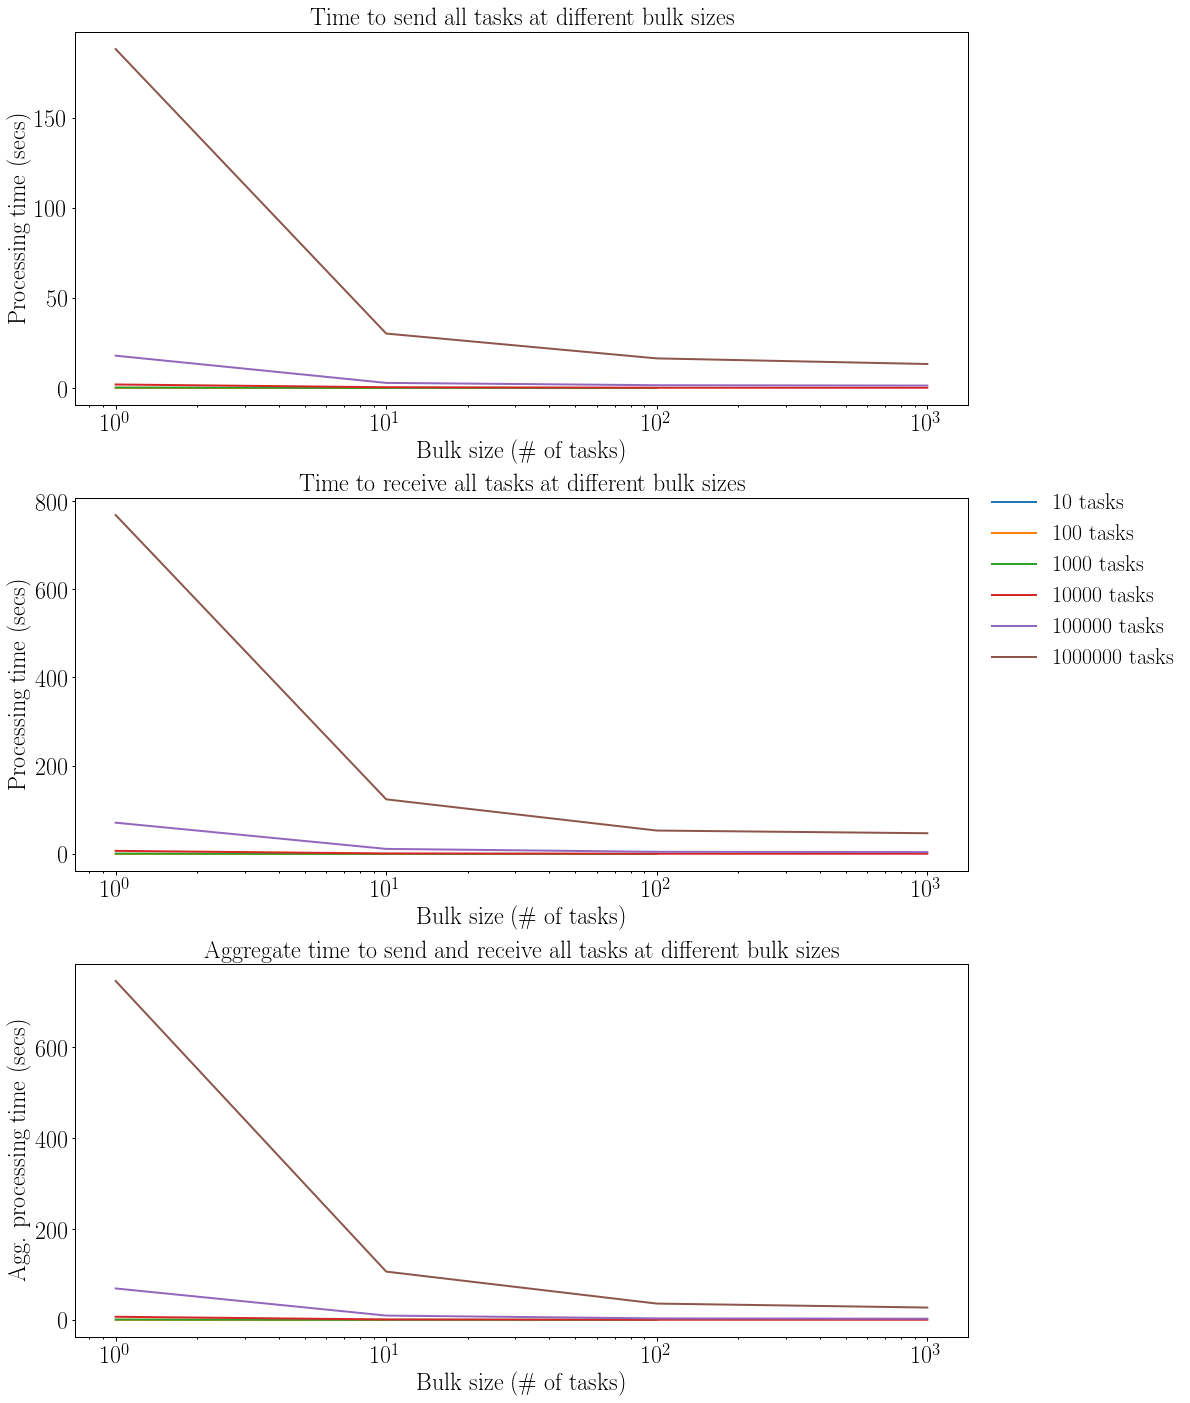

In [6]:
fig, ax = fig_setup(num_x=3,size_x=16, size_y=24, space_y=0.25)

ax1 = df_sendr.plot(ax=ax[0][0], 
                    kind='line', 
                    legend=False, 
                    color= [tableau20[0], tableau20[2], tableau20[4],
                            tableau20[6], tableau20[8], tableau20[10]]
                )
ax1.set_xlabel('Bulk size (\# of tasks)')
ax1.set_ylabel('Processing time (secs)')
ax1.set_xscale('log',basex=10)
ax1.set_title('Time to send all tasks at different bulk sizes')

ax2 = df_recvr.plot(ax=ax[0][1],
                    kind='line', 
                    legend=False, 
                    color= [tableau20[0], tableau20[2], tableau20[4],
                            tableau20[6], tableau20[8], tableau20[10]])
ax2.set_xlabel('Bulk size (\# of tasks)')
ax2.set_ylabel('Processing time (secs)')
ax2.set_xscale('log',basex=10)
ax2.set_title('Time to receive all tasks at different bulk sizes')


ax3 = df_agg.plot(ax=ax[0][2],
                    kind='line', 
                    legend=False, 
                    color= [tableau20[0], tableau20[2], tableau20[4],
                            tableau20[6], tableau20[8], tableau20[10]])
ax3.set_xlabel('Bulk size (\# of tasks)')
ax3.set_ylabel('Agg. processing time (secs)')
ax3.set_xscale('log',basex=10)
ax3.set_title('Aggregate time to send and receive all tasks at different bulk sizes')



h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles = h1
labels = [l + ' tasks' for l in l1]
plt.legend(handles, labels, loc = 'lower center', bbox_to_anchor = (0.5,0.5,1,1), bbox_transform = plt.gcf().transFigure, ncol=1)

Time to send and receive (and aggregate time) EnTK "Task" objects in different bulk sizes between two Python processes.
This mimics the communication behavior between the WFProcessor and TaskManager components in EnTK.

In [11]:
tasks = [1, 10,100,1000,10000,100000,1000000]
loc = './task-conv/raw-data'
opd = '../'

In [12]:
df = pd.DataFrame(columns=['Conversion time'])

for t in tasks:
    sdata = open('%s/tasks-%s/cud_2_task.txt'%(loc,t),'r').readlines()
    dur = float(sdata[1].split(':')[1].strip()) - float(sdata[0].split(':')[1].strip())
    df.loc[t] = dur         

display(df)

,Conversion time
1,0.002203
10,0.020220
100,0.154347
1000,1.511198
10000,15.020460
100000,150.183591
1000000,1172.145671


Text(0.5,1,u'Time to convert tasks to cuds')

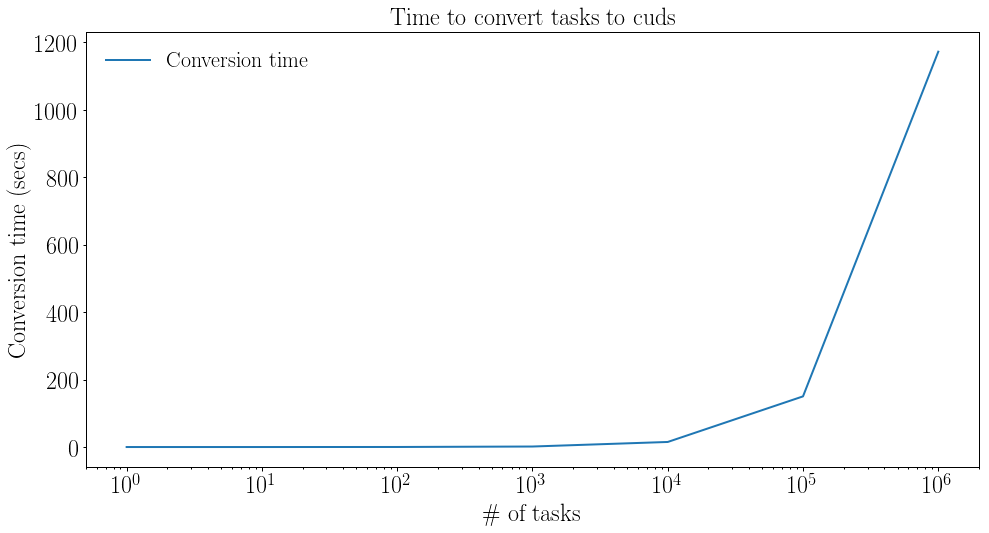

In [13]:
fig, ax = fig_setup(num_x=1,size_x=16, size_y=8, space_y=0.25)

ax1 = df.plot(ax=ax[0][0], 
                    kind='line', 
#                     legend=False, 
                    color= [tableau20[0]]
                )
ax1.set_xlabel('\# of tasks')
ax1.set_ylabel('Conversion time (secs)')
ax1.set_xscale('log',basex=10)
ax1.set_title('Time to convert tasks to cuds')

# h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# handles = h1
# labels = [l + ' tasks' for l in l1]
# plt.legend(handles, labels, loc = 'lower center', bbox_to_anchor = (0.5,0.5,1,1), bbox_transform = plt.gcf().transFigure, ncol=1)

Performance of the EnTK method that converts EnTK tasks into RP compute unit descriptions.

In [14]:
bulks = [1,10,100,1000]
tasks = [10,100,1000,10000,100000]
loc = './rp-cud-sub-rate/raw-data'
opd = './'

In [15]:
df = pd.DataFrame(columns=tasks, index=bulks)

for t in tasks:
    for b in bulks:
        if b < t:
            sdata = open('%s/bulk-%s-tasks-%s/cud_submission.txt'%(loc,b,t),'r').readlines()
            dur = float(sdata[1].split(':')[1].strip()) - float(sdata[0].split(':')[1].strip())
            df[t][b] = dur         

display(df)

,10,100,1000,10000,100000
1,1.63127,14.4765,136.647,1327.31,12017.3
10,NaN,2.25966,15.693,173.73,1455.09
100,NaN,NaN,6.07363,58.3446,528.425
1000,NaN,NaN,NaN,36.7015,359.01


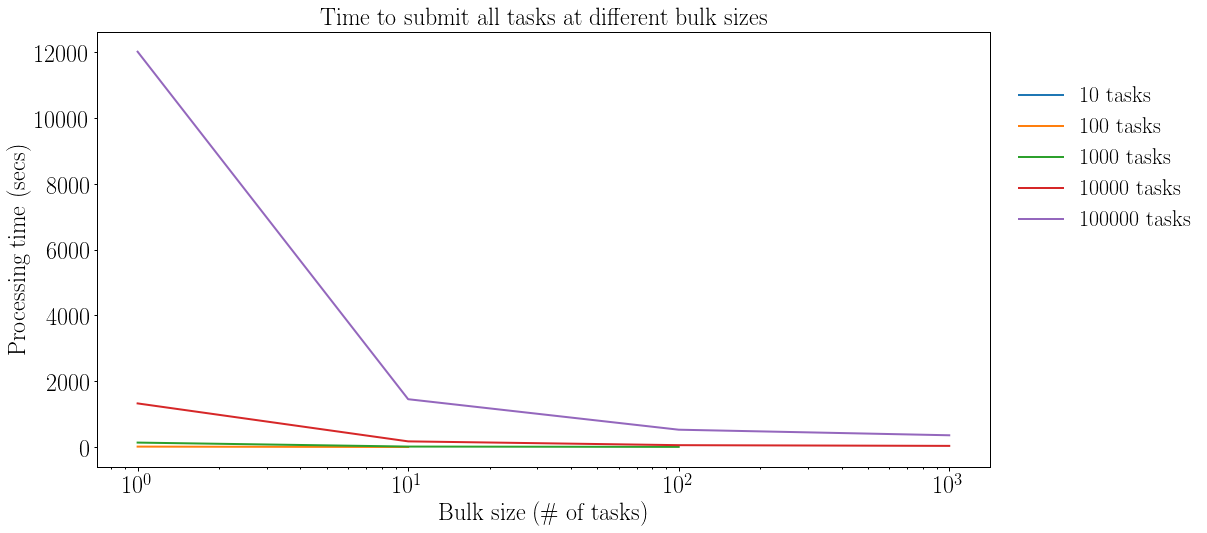

In [16]:
fig, ax = fig_setup(num_x=1,size_x=16, size_y=8, space_y=0.25)

ax1 = df.plot(ax=ax[0][0], 
                    kind='line', 
                    legend=False, 
                    color= [tableau20[0], tableau20[2], tableau20[4],
                            tableau20[6], tableau20[8]]
                )
ax1.set_xlabel('Bulk size (\# of tasks)')
ax1.set_ylabel('Processing time (secs)')
ax1.set_xscale('log',basex=10)
ax1.set_title('Time to submit all tasks at different bulk sizes')

h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
handles = h1
labels = [l + ' tasks' for l in l1]
plt.legend(handles, labels, loc = 'lower center', bbox_to_anchor = (0.5,0.5,1,1), bbox_transform = plt.gcf().transFigure, ncol=1)

Time to submit units using the "submit_units" method of the RP Unit Manager. This time computes the time between when the submit_units() method is called and control is returned back from the method.